### Bài 3: Viết CT Python (ko dùng các hàm thư viện) để tính các ước lượng về độ biến thiên dữ liệu dân số và dữ liệu tội phạm của các bang nước Mỹ (dataset như BT 2) gồm: độ lệch chuẩn, IQR, và MAD

#### Đọc data

In [27]:
import pandas as pd

In [28]:
dataset = pd.read_csv('state.csv')

In [29]:
dataset

,State,Population,Murder.Rate,Abbreviation
0,Alabama,4779736,5.7,AL
1,Alaska,710231,5.6,AK
2,Arizona,6392017,4.7,AZ
3,Arkansas,2915918,5.6,AR
4,California,37253956,4.4,CA
5,Colorado,5029196,2.8,CO
6,Connecticut,3574097,2.4,CT
7,Delaware,897934,5.8,DE
8,Florida,18801310,5.8,FL
9,Georgia,9687653,5.7,GA


#### Dân số

In [30]:
pop = dataset['Population'].to_numpy()

##### Độ lệch chuẩn

In [31]:
import numpy as np
def std(data):
    data = np.array(data)
    data_count = len(data)
    data_sum = 0
    for i in range(len(data)):
        data_sum += data[i]
    data_mean = data_sum/data_count
    data_sum_sq = 0
    for d in data:
        data_sum_sq += pow(d-data_mean,2)
    data_std = pow(data_sum_sq/data_count,0.5)
    return data_std

In [32]:
pop_std = std(pop)
pop_std

6779407.114632265

##### IQR

In [33]:
def percentile(data, p):
    data = np.sort(data)
    if len(data)%2 == 0:
        w = 0.5
        j = int(len(data)*p/100)
        res = (1-w)*data[j] + w*data[j+1]
        return res
    else:
        j = int(len(data)*p/100)
        return data[j]

In [34]:
def IQR(data):
    q1 = percentile(data, 25)
    q3 = percentile(data, 75)
    return q3-q1

In [35]:
pop_IQR = IQR(pop)
pop_IQR

5523114.5

##### MAD

In [36]:
def MAD(data):
    ad = []
    for p in data:
        ad.append(abs(p-np.mean(data)))
    return percentile(ad, 50)

In [37]:
pop_MAD = MAD(pop)
pop_MAD

3493551.0

#### Tội phạm

In [38]:
mr = dataset['Murder.Rate'].to_numpy()

##### Độ lệch chuẩn

In [39]:
mr_std = std(mr)
mr_std

1.8964820062420842

##### IQR

In [40]:
mr_IQR = IQR(mr)
mr_IQR

3.1499999999999995

##### MAD

In [41]:
mr_MAD = MAD(mr)
mr_MAD

1.6

### Bài 4: Viết CT Python (ko dùng các hàm thư viện) để tính Frequency Table với 10 và 20 đoạn (bin) của dân số các bang nước Mỹ (dataset như BT 2). So sánh kết quả trong 2 trường hợp.

In [42]:
def freq_table(data, num_bins):
    data_min = np.min(data)
    data_max = np.max(data)
    bin_size = (data_max - data_min)/num_bins
    bins = np.zeros(num_bins+1)
    bins[0] = data_min
    for i in range(1, num_bins+1):
        bins[i] = bins[i-1] + bin_size
    counts = np.zeros(num_bins)
    for d in data:
        # if d equal data_max then bin_index would be equal to num_bins
        bin_index = int((d-data_min)/bin_size)
        if bin_index == num_bins:
            counts[-1] += 1
        else:
            counts[bin_index] +=1
    freq_table = {}
    for i in range(num_bins):
        bin_label = f"{bins[i]:.1f}-{bins[i+1]:.1f}"
        freq_table[i] = (bin_label, int(counts[i]))
    return freq_table
    

In [43]:
fq1 = freq_table(pop, 10)
fq2 = freq_table(pop, 20)
fq1 = pd.DataFrame.from_dict(fq1, orient='index', columns=['BinRange', 'Count'])
fq2 = pd.DataFrame.from_dict(fq2, orient='index', columns=['BinRange', 'Count'])


In [44]:
fq1

,BinRange,Count
0,563626.0-4232659.0,24
1,4232659.0-7901692.0,14
2,7901692.0-11570725.0,6
3,11570725.0-15239758.0,2
4,15239758.0-18908791.0,1
5,18908791.0-22577824.0,1
6,22577824.0-26246857.0,1
7,26246857.0-29915890.0,0
8,29915890.0-33584923.0,0
9,33584923.0-37253956.0,1


In [45]:
fq2

,BinRange,Count
0,563626.0-2398142.5,15
1,2398142.5-4232659.0,9
2,4232659.0-6067175.5,9
3,6067175.5-7901692.0,5
4,7901692.0-9736208.5,4
5,9736208.5-11570725.0,2
6,11570725.0-13405241.5,2
7,13405241.5-15239758.0,0
8,15239758.0-17074274.5,0
9,17074274.5-18908791.0,1


### Bootstrap method

In [56]:
original_sample = [81,32,49,54,44,74,98,42,54,51,
69,49,43,5,1,5,35,55,4,20,
25,34,31,65,46,92,2,4,41,38]
original_sample = np.array(original_sample)

num_bootstraps = 1000
sample_size = 20

bootstraps = np.zeros((num_bootstraps, sample_size))

for i in range(num_bootstraps):
    for j in range(sample_size):
        bootstrap_indices = np.random.choice(original_sample.shape[0],  replace=True)
        bootstraps[i,j] = original_sample[bootstrap_indices]


In [57]:
mean = np.mean(bootstraps, axis=1)
median = np.median(bootstraps, axis=1)
IQR = np.percentile(bootstraps, 75, axis=1) - np.percentile(bootstraps, 25, axis=1)
std = np.std(bootstraps, axis=1)

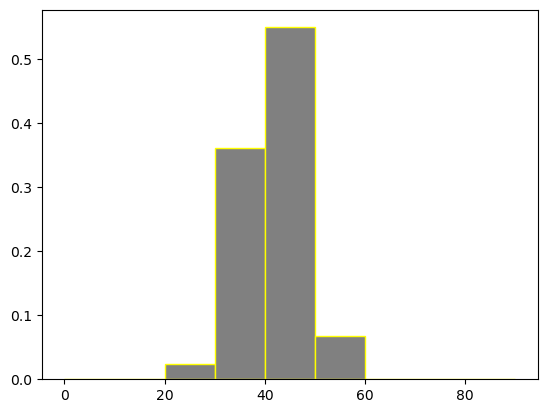

In [58]:
import matplotlib.pyplot as plt
plt.hist(mean, bins=[0, 10, 20, 30, 40, 50, 60, 70, 80, 90], edgecolor="yellow", color="grey", weights=np.ones_like(mean) / len(mean))
plt.show()